# 1. Fixed-point iteration

Rewrite $f(x) = 0$ as $x = \phi(x)$ so that
$$f(x_*) = 0 \Leftrightarrow x_* = \phi(x_*),$$
where $x_*$ is the root of the first equation.

The simplest way of costructing $\phi(x)$ is
$$\phi(x) = x - \alpha f(x).$$

The iterative process
$$x_{n+1} = \phi(x_{n})$$
converges to the root $x_*$ if $\lim\limits_{n \rightarrow} x_n = x_*$.

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$ in the form

$$
\phi(x) = x - \alpha f(x),
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$ (visualize this dependence for three different values of $epsilon$). Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval (highlight it on the plot).

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.xkcd()

In [3]:
def f(x):
    return np.cos(x)

In [4]:
def g(x):
    return np.sqrt(x)

In [5]:
from scipy import optimize
def func(x):
    return np.sqrt(x) - np.cos(x)
    

In [6]:
def dfunc(x):
    return (1/(2* np.sqrt(x))) + np.sin(x)

In [7]:
def dx(func, x):
    return abs(0-func(x))

/home/liza/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


/home/liza/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


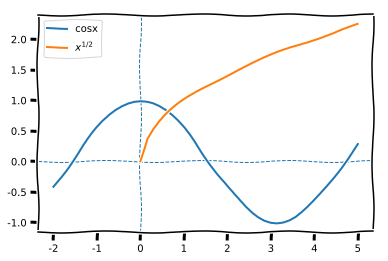

<Figure size 432x288 with 0 Axes>

In [8]:
xx = np.linspace(-2, 5)
fig, ax = plt.subplots()
ax.axvline(0, ls='--', lw=1) 
plt.axhline(0, ls='--', lw=1)
plt.figure()
ax.plot(xx, f(xx), label='cosx')
ax.plot(xx, g(xx), label='$x^{1/2}$')
ax.legend()

In [9]:
sol = optimize.newton(func, 0.4)
print(sol)
print(func(sol))

0.6417143708728826
0.0


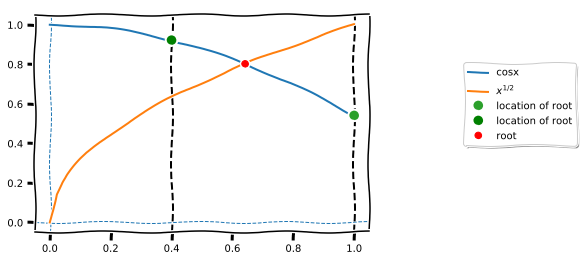

<Figure size 432x288 with 0 Axes>

In [10]:
xx = np.linspace(0, 1)
fig, ax = plt.subplots()
ax.axvline(0, ls='--', lw=1) 
ax.axhline(0, ls='--', lw=1)
ax.axvline(1, ls='--', color = 'k', lw=2) 
ax.axvline(0.4, ls='--',color = 'k', lw=2)
plt.figure()
ax.plot(xx, f(xx), label = 'cosx')
ax.plot(xx, g(xx), label = '$x^{1/2}$')
ax.plot(1, f(1), 'o', ms=9, mec='none', label = 'location of root')
ax.plot(0.4, f(0.4), 'o', color= 'g', ms=9, mec='none', label = 'location of root')
ax.plot(sol, f(sol), 'ro', label = 'root')
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)



In [11]:
def fixet_point(func, alpha, x0, e):
    delta = dx(f, x0)
    steps = 0
    while delta > e:
        x0 = x0 - alpha*func(x0)
        delta = dx(func, x0)
        steps+=1
    return x0, func(x0), steps

In [12]:
dfunc_res = []
interval = np.linspace(0.4,1)
for i in interval:
    dfunc_res.append(dfunc(i))    

In [13]:
max(dfunc_res), min(dfunc_res)

(1.3414709848078965, 1.1792816793119225)

In [26]:
alpha = np.linspace(0.1, 1.5, 20)
alpha_opt = 2/(max(dfunc_res)+min(dfunc_res))
eps = [0.8997, 0.1, 0.001]
for i in alpha:
    print('root=', fixet_point(func, i, 0.1, eps[2])[0], 'f(x) at root=', fixet_point(func, i, 0.1, eps[0])[1],
             'steps=', fixet_point(func, i, 0.1, eps[2])[2], 'alpha=', i, 'eps=', eps[2])

root= 0.6409838677531352 f(x) at root= -0.5762128733199363 steps= 51 alpha= 0.1 eps= 0.001
root= 0.6410077812802227 f(x) at root= -0.50956532066345 steps= 28 alpha= 0.17368421052631577 eps= 0.001
root= 0.641112814554677 f(x) at root= -0.4467286786945909 steps= 19 alpha= 0.24736842105263157 eps= 0.001
root= 0.6411904022631928 f(x) at root= -0.3860401754292915 steps= 14 alpha= 0.32105263157894737 eps= 0.001
root= 0.6409455934348288 f(x) at root= -0.32649202068914984 steps= 10 alpha= 0.39473684210526316 eps= 0.001
root= 0.6410982256560368 f(x) at root= -0.2674286829924418 steps= 8 alpha= 0.46842105263157896 eps= 0.001
root= 0.640911554115328 f(x) at root= -0.20840453979799423 steps= 6 alpha= 0.5421052631578946 eps= 0.001
root= 0.6412253797778685 f(x) at root= -0.14910883224836968 steps= 5 alpha= 0.6157894736842104 eps= 0.001
root= 0.641412647908227 f(x) at root= -0.08932265189334831 steps= 4 alpha= 0.6894736842105262 eps= 0.001
root= 0.6416036466092973 f(x) at root= -0.028892647314565867 

In [27]:
steps_list = []
for i in alpha:
    steps_list.append(fixet_point(func, i, 0.1, eps[2])[2])

<Figure size 432x288 with 0 Axes>

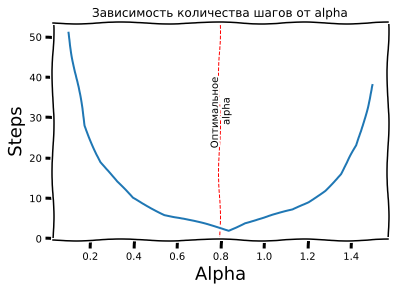

<Figure size 432x288 with 0 Axes>

In [46]:
fig, ax = plt.subplots()
ax.axvline(alpha_opt, c = 'r', ls='--', lw=1)
ax.text(0.8, 40, 'Оптимальное\n alpha',
         rotation=90,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')

ax.plot(alpha,steps_list)
plt.xlabel("Alpha", size=18)
plt.ylabel("Steps", size=18)
ax.set_title('Зависимость количества шагов от alpha')
plt.figure()   


In [50]:
# for optimal alpha
for j in eps:
        print('root=', fixet_point(func, alpha_opt, 0.1, j)[0], 'f(x) at root=', fixet_point(func, alpha_opt, 0.1, j)[1],
             'steps=', fixet_point(func, alpha_opt, 0.1, j)[2], 'alpha=', alpha_opt, 'eps=', j)

root= 0.6385505757251269 f(x) at root= -0.003866908268743363 steps= 1 alpha= 0.7934138197959012 eps= 0.8997
root= 0.6385505757251269 f(x) at root= -0.003866908268743363 steps= 1 alpha= 0.7934138197959012 eps= 0.1
root= 0.6416186341854309 f(x) at root= -0.0001170590830243956 steps= 2 alpha= 0.7934138197959012 eps= 0.001


###### Вывод: При значениях alpha удаленных от оптимального, количество шагов значительно увеличевается при заданном eps. При значениях alpha близких к оптимальному количство шагов уменьшается.

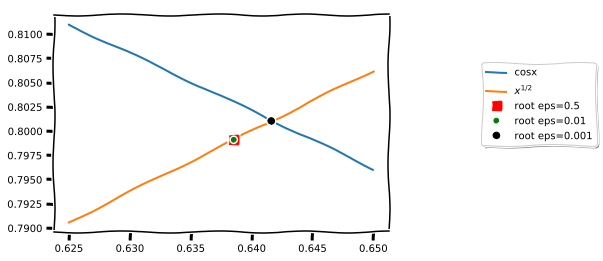

<Figure size 432x288 with 0 Axes>

In [77]:
xx = np.linspace(0.625, 0.65)
eps = [0.5, 0.01, 0.001]
fig, ax = plt.subplots()
#ax.axvline(0, ls='--', lw=1) 
#ax.axhline(0, ls='--', lw=1)
plt.figure()
ax.plot(xx, f(xx), label = 'cosx')
ax.plot(xx, g(xx), label = '$x^{1/2}$')
#ax.plot([1, 0.4], [f(1), f(0.4)], 'o', ms=9, mec='none', label = 'location of root')
ax.plot(fixet_point(func, alpha_opt, 0.1, eps[0])[0],g(fixet_point(func, alpha_opt, 0.1, eps[0])[0]), 'rs',ms=9, label = 'root eps=0.5')
ax.plot(fixet_point(func, alpha_opt, 0.1, eps[1])[0],g(fixet_point(func, alpha_opt, 0.1, eps[1])[0]), 'go', ms=4, label = 'root eps=0.01')
ax.plot(fixet_point(func, alpha_opt, 0.1, eps[2])[0],g(fixet_point(func, alpha_opt, 0.1, eps[2])[0]), 'ko', ms=6, label = 'root eps=0.001')
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)

Find the solution (and number of iterations) of the equation above using fixed-point iteration for $\alpha = 1$ and $\epsilon = 0.001$ (for Google form).

In [56]:
print('root=', fixet_point(func, 1, 0.1, 0.001)[0], 'f(x) at root=', fixet_point(func, 1, 0.1, 0.001)[1], 'steps=', fixet_point(func, 1, 0.1, 0.001)[2])

root= 0.642078983120178 f(x) at root= 0.0004458448032341744 steps= 5


#### Newton's method as the on of the fixed point iteration methods

In [12]:
def dfunc(x):
    return (1/(2* np.sqrt(x))) + np.sin(x)

In [13]:
def dx(func, x):
    return abs(0-func(x))

In [14]:
def newtons_method(func, dfunc, x0, e):
    delta = dx(f, x0)
    steps = 0
    while delta > e:
        x0 = x0 - func(x0)/dfunc(x0)
        delta = dx(func, x0)
        steps+=1
    return x0, func(x0), steps
print ('Root is at: ', newtons_method(func, dfunc, 0.4, 0.0001)[0])
print ('f(x) at root is: ', newtons_method(func, dfunc, 0.4, 0.0001)[1])
print ('steps: ', newtons_method(func, dfunc, 0.4, 0.0001)[2])

Root is at:  0.6417154329594612
f(x) at root is:  1.2986497982536704e-06
steps:  2


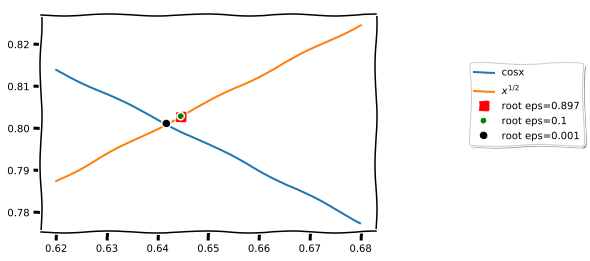

<Figure size 432x288 with 0 Axes>

In [15]:
xx = np.linspace(0.62, 0.68)
eps = [0.8997, 0.1, 0.001]
fig, ax = plt.subplots()
#ax.axvline(0, ls='--', lw=1) 
#ax.axhline(0, ls='--', lw=1)
plt.figure()
ax.plot(xx, f(xx), label = 'cosx')
ax.plot(xx, g(xx), label = '$x^{1/2}$')
#ax.plot([1, 0.4], [f(1), f(0.4)], 'o', ms=9, mec='none', label = 'location of root')
ax.plot(newtons_method(func, dfunc, 0.4, eps[0])[0],g(newtons_method(func, dfunc, 0.4, eps[0])[0]), 'rs',ms=9, label = 'root eps=0.897')
ax.plot(newtons_method(func, dfunc, 0.4, eps[1])[0],g(newtons_method(func, dfunc, 0.4, eps[1])[0]), 'go', ms=4, label = 'root eps=0.1')
ax.plot(newtons_method(func, dfunc, 0.4, eps[2])[0],g(newtons_method(func, dfunc, 0.4, eps[2])[0]), 'ko', ms=6, label = 'root eps=0.001')
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)

In [16]:
print ('Root is at: ', newtons_method(func, dfunc, 0.4, 0.001)[0])
print ('f(x) at root is: ', newtons_method(func, dfunc, 0.4, 0.001)[1])
print ('steps: ', newtons_method(func, dfunc, 0.4, 0.001)[2])

Root is at:  0.6417154329594612
f(x) at root is:  1.2986497982536704e-06
steps:  2


# 2. Inverse quadratic interpolation

Suppose we have three different consequitive iterates $x_0$, $x_1$ and $x_2$ and a function $f(x)$: $y_i = f(x_i)$.

Construct a unique parabola which passes through $(x_i, y_i)$. Take as a next approximation, $x_3$, the root of this parabola.

In order not to solve another nonlinear equation on each step, use an inverse interpolation: construct a second order polynomial $Q(y)$ such that $Q(y_i) = x_i$. Then $x_3 = Q(0)$.

Now, write a function which finds the solution using inverse quadratic interpolation up to a predefined accuracy $\epsilon$.

In [17]:
def inv_quad_interpolation(point_0, point_1, point_3, eps):
    f_q = lambda x: np.cos(x)/np.sin(x)
    steps = 0 
    while abs(point_1-point_0) > eps: # last guess and new guess are v close
        fx0 = f_q(point_0)
        fx1 = f_q(point_1)
        fx2 = f_q(point_3)
        L0 = (point_0 * fx1 * fx2) / ((fx0 - fx1) * (fx0 - fx2))
        L1 = (point_1 * fx0 * fx2) / ((fx1 - fx0) * (fx1 - fx2))
        L2 = (point_3 * fx1 * fx0) / ((fx2 - fx0) * (fx2 - fx1))
        new = L0 + L1 + L2
        point_0, point_1, point_3 = new, point_0, point_1
        steps += 1
    return point_0, steps

Now implement your function to solve equation
$$x = \mbox{ctg}(x)$$
in the interval $x \in (0.5, 1)$ with $x_0 = 0.6$, $x_1 = 0.8$ and $x_2 = 1$. What is the solution for $\epsilon = 0.001$? How many iterations did it take to find it? (You will need the answers for Google Form).

In [18]:
root, steps = inv_quad_interpolation(0.6, 0.8, 1, 0.001)
print ("root is:", root)
print ("steps:", steps)

root is: 1.5707963266948726
steps: 4


# 3. Newton-Raphson method

Implement the Newton-Raphson method to solve equation $z^3 - 1 = 0$ for complex $z$. Visualize and describe the convergence domain.

In [19]:
def z(x):
    return x**3-1

In [20]:
def dz(x):
    return 3*x**2

In [21]:
def dx(z, x):
    return abs(0-z(x))

In [22]:
def newtons_method_complex(z, dz, x0, e):
    delta = dx(z, x0)
    steps = 0
    while delta > e:
        x0 = x0 - z(x0)/dz(x0)
        delta = dx(z, x0)
        steps+=1
    return x0, z(x0), steps


In [23]:
newtons_method_complex(z, dz, 0.5+1j, 0.004)[0]

(-0.500003623589723-0.8660302370744487j)

In [24]:
xrange = np.arange(-10,10,0.01) + 1j * np.arange(-10,10,0.01)

In [25]:
data_my = []
for k in range(len(xrange)):
    data_my.append(newtons_method_complex(z, dz, xrange[k], 0.5)[0])

In [26]:
first = []
for i in data_my:
    if i.real>0:
        first.append(i)
second = []
for k in data_my:
    if k.real< 0 and k.imag>0:
        second.append(k)

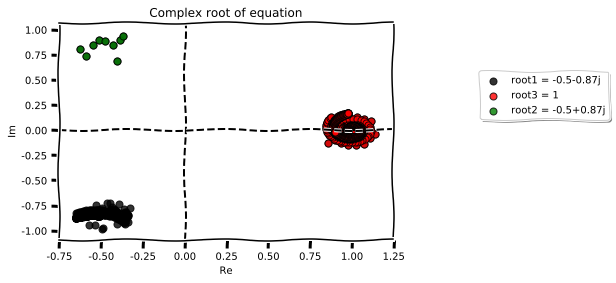

<Figure size 432x288 with 0 Axes>

In [28]:
fig, ax = plt.subplots()
ax.axvline(0, ls='--',color ='k', lw=2) 
ax.axhline(0, ls='--',color = 'k', lw=2)
plt.figure()


X = [x.real for x in data_my]
Y = [x.imag for x in data_my]
ax.scatter(X, Y, alpha=0.8, c='k', edgecolors='k', s=50, label='root1 = -0.5-0.87j')

X1 = [x.real for x in first]
Y1 = [x.imag for x in first]
ax.scatter(X1, Y1, alpha=0.8, c='r', edgecolors='k', s=50, label='root3 = 1')

X2 = [x.real for x in second]
Y2 = [x.imag for x in second]
ax.scatter(X2, Y2, alpha=0.8, c='g', edgecolors='k', s=50, label= 'root2 = -0.5+0.87j')
    

ax.set_xlabel('Re')
ax.set_ylabel('Im')
ax.set_title('Complex root of equation')
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)

Hint: visualize the convergence domain as a scatter plot of coloured points (the colour of the point depends on the root it converged to).